In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# settings
N = 5
gamma = np.zeros(N)
omega = np.random.uniform(low = 1.0, high = 4.0, size = N)
L = np.random.uniform(low = 0.1, high = 1.0, size = N)

In [2]:
def D(s, gamma, omega):
    u = s[0]
    v = s[1]
    return np.array(( v, -2 * gamma * v - omega**2 * np.sin(u)))

U_0 = np.ones(N)
V_0 = np.zeros(N)

In [3]:
deltaT = 0.1

T_min, T_max = 0, 20

steps = int( (T_max-T_min) / deltaT )

In [4]:
STrajectory = np.zeros((N , 2))

for i in range(N):
    STrajectory[i][0] = U_0[i]
    STrajectory[i][1] = V_0[i]

In [5]:
def RK4(s, gamma, omega):
    d1 = deltaT * D(s,      gamma, omega)
    d2 = deltaT * D(s+d1/2, gamma, omega)
    d3 = deltaT * D(s+d2/2, gamma, omega)
    d4 = deltaT * D(s+d3,   gamma, omega)
    return s + d1/6 + d2/3 + d3/3 + d4/6

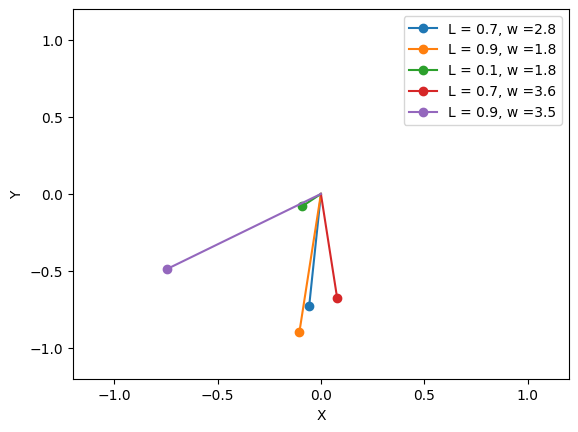

In [6]:
fig, ax = plt.subplots()
LineTrajectory = [0] * N

for j in range(N):
    point = (L[j] * np.sin(STrajectory[j,0]), -L[j] * np.cos(STrajectory[j,0]))
    LineTrajectory[j] = ax.plot([0, point[0]], [0, point[1]], markevery=(1,1), marker='o')[0]

ax.legend(['L = %.1f, w =%.1f' %(L[j], omega[j]) for j in range(N)])

plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)

ax.set(xlabel='X', ylabel='Y', )

def loop_animation(i):
    for j in range(N):
        LineTrajectory[j].set_data([0, L[j] * np.sin(STrajectory[j,0])], [0, -L[j] * np.cos(STrajectory[j,0])])

    for j in range(N):
        STrajectory[j] = RK4(STrajectory[j],gamma[j],omega[j])

    return (LineTrajectory)

ani = animation.FuncAnimation(
    fig=fig, 
    func=loop_animation, 
    frames=steps, 
    interval=40,
    repeat=True,
    repeat_delay=0
)
ani.save(filename="5_pendulum.gif", writer="ffmpeg")